In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

#Attempt 1

In [3]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [4]:
train = pd.read_csv('/content/drive/My Drive/AnalyticsVidhya_Tweet_sentiment_Files/train_2kmZucJ.csv')
train.head()
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv('/content/drive/My Drive/AnalyticsVidhya_Tweet_sentiment_Files/test_oJQbWVk.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (7920, 3) 7920
Test Set: (1953, 2) 1953


In [0]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

1    5894
0    5894
Name: label, dtype: int64


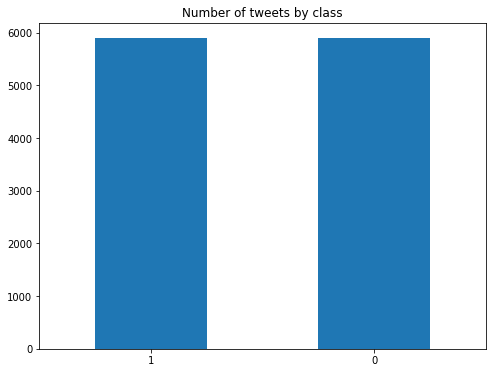

In [6]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
print(train_upsampled['label'].value_counts())
train_upsampled['label'].value_counts().plot(kind='bar', figsize=(8, 6), rot=0, legend=False, title='Number of tweets by class');

In [7]:
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]
 
train_majority_downsampled = resample(train_majority, 
                                 replace=True,  
                                 n_samples=len(train_minority),   
                                 random_state=123)
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
train_downsampled['label'].value_counts()


1    2026
0    2026
Name: label, dtype: int64

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),
])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],train_upsampled['label'],random_state = 0)

In [10]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_predict)

0.9306666666666668

In [11]:
test_clean.head()

,id,tweet
0,7921,i hate the new iphone upgrade wont let me down...
1,7922,currently shitting my fucking pants apple imac...
2,7923,id like to puts some cdroms on my ipad is that...
3,7924,my ipod is officially dead i lost all my pictu...
4,7925,been fighting itunes all night i only want the...


### TEST

In [12]:
y_predict_final = model.predict(test_clean['tweet'])
Final_df = pd.DataFrame({'id':test_clean['id'], 'label':y_predict_final})
Final_df.head()
#Final_df.to_csv('sample_submission.csv', header=True, index=False)

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [0]:
Final_df.to_csv('sample_submission.csv', header=True, index=False)

In [14]:
Final_df['label'].value_counts()

0    1334
1     619
Name: label, dtype: int64